In [10]:
import pandas as pd

# Chargement du jeu de données
df = pd.read_csv('valeursfoncieres-2020.txt',sep="|",decimal=",")
df.head()

/Users/lfevre/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (14,18,23,24,26,28,41) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Code service CH,Reference document,1 Articles CGI,2 Articles CGI,3 Articles CGI,4 Articles CGI,5 Articles CGI,No disposition,Date mutation,Nature mutation,...,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Type local,Identifiant local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,07/01/2020,Vente,...,NaN,0,NaN,NaN,NaN,NaN,NaN,T,NaN,1061.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,02/01/2020,Vente,...,NaN,0,NaN,NaN,NaN,NaN,NaN,BT,NaN,85.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,02/01/2020,Vente,...,NaN,0,NaN,NaN,NaN,NaN,NaN,T,NaN,1115.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,02/01/2020,Vente,...,NaN,0,NaN,NaN,NaN,NaN,NaN,T,NaN,1940.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,02/01/2020,Vente,...,NaN,0,NaN,NaN,NaN,NaN,NaN,T,NaN,1148.0


In [11]:
# print(df.columns)

# etude ciblé sur un département
df=df[df['Code departement']==75]

# df.head()
# df.info()
features = ['Valeur fonciere','Nombre de lots','1er lot','Type local']
#print(df[features])

# etude par type de biens
df['Type local'].value_counts()

# etude du nombre de lots par type de biens
pd.crosstab(df['Type local'], df['Nombre de lots'])
# on observe un nombre quelque fois important de lots même pour des appartements (21)

# repartition du nombre
# print(df['Nombre de lots'].value_counts())
# recherche de biens spécifique
# print(df[(df['Type local']=='Appartement') & (df['Nombre de lots']==21)])


Nombre de lots,0,1,2,3,4,5,6,7,8,9,...,18,21,22,27,30,31,33,35,42,80
Type local,,,,,,,,,,,,,,,,,,,,,
Appartement,2786,14300,14741,1665,536,169,70,39,18,9,...,0,1,0,0,0,0,0,0,0,0
Dépendance,551,11710,316,43,14,9,2,0,0,3,...,0,0,0,0,0,0,0,1,0,0
Local industriel. commercial ou assimilé,1428,2724,976,273,147,70,42,20,22,12,...,2,0,1,1,1,1,3,0,1,1
Maison,127,25,9,4,7,1,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
# calcul du prix au mettre carré pour un appartement
app=df[df['Type local']=='Appartement']
app=app[['Valeur fonciere','Surface reelle bati','Type local']] # seulement sur des données qui nous intéressent
app['pm2']=app['Valeur fonciere']/app['Surface reelle bati']
print(app)

         Valeur fonciere  Surface reelle bati   Type local           pm2
2405430         268800.0                 24.0  Appartement  11200.000000
2405432         878378.0                 66.0  Appartement  13308.757576
2405433         680000.0                 51.0  Appartement  13333.333333
2405434         852000.0                 12.0  Appartement  71000.000000
2405435         852000.0                 19.0  Appartement  44842.105263
...                  ...                  ...          ...           ...
2459553        1937500.0                 29.0  Appartement  66810.344828
2459554        1937500.0                 27.0  Appartement  71759.259259
2459555        1937500.0                 87.0  Appartement  22270.114943
2459557        1937500.0                 82.0  Appartement  23628.048780
2459559         255000.0                 21.0  Appartement  12142.857143

[34346 rows x 4 columns]


In [14]:
# analyse première de répartition du prix au mettre carré
app.pm2.describe()

print(app.sort_values("pm2", ascending=False))
# en effet il y a les nan aussi

# recherche d'explications sur les données au prix astronomique
print(df.loc[2408569])

         Valeur fonciere  Surface reelle bati   Type local           pm2
2408569      268000000.0                 12.0  Appartement  2.233333e+07
2413745       93141336.0                  5.0  Appartement  1.862827e+07
2408548      268000000.0                 26.0  Appartement  1.030769e+07
2408578      268000000.0                 27.0  Appartement  9.925926e+06
2408580      268000000.0                 32.0  Appartement  8.375000e+06
...                  ...                  ...          ...           ...
2450826              NaN                 15.0  Appartement           NaN
2450828              NaN                 10.0  Appartement           NaN
2457806              NaN                 23.0  Appartement           NaN
2458810              NaN                 22.0  Appartement           NaN
2458975              NaN                 94.0  Appartement           NaN

[34346 rows x 4 columns]
Code service CH                                    NaN
Reference document                         

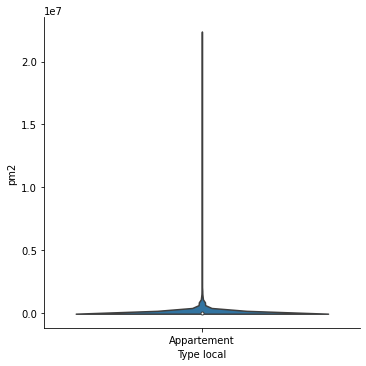

In [15]:
# visualisation de la répartition
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns


sns.catplot(x="Type local", y="pm2",kind="violin",data=app);


# sns.displot(app.pm2, bins=10, kde=True, rug=True, color='red');
# sns.displot(app.pm2);